In [ ]:
# 1. Import thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('ETH-USD-2 (2).csv')
df1=df.reset_index()['Close']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 20s 357ms/step - loss: 0.0338 - val_loss: 0.0054
Epoch 2/100
16/16 [==============================] - 3s 212ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 3/100
16/16 [==============================] - 3s 204ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 4/100
16/16 [==============================] - 3s 203ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 5/100
16/16 [==============================] - 4s 280ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 6/100
16/16 [==============================] - 3s 198ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 7/100
16/16 [==============================] - 3s 198ms/step - loss: 0.0022 - val_loss: 0.0060
Epoch 8/100
16/16 [==============================] - 4s 236ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 9/100
16/16 [==============================] - 4s 239ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 10/100
16/16 [==============================] - 3s 204ms/step - loss: 0.0020 - val_l

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 46ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 177141615515171.25
Testing RMSE: 208683676027649.53
Validation MAPE: 24443533026424.047
Testing MAPE: 27583872186094.72


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=125
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.23166853 0.22634925 0.23629392 0.2530303  0.24890614 0.25273603
 0.24190907 0.24975216 0.24538049 0.24792471 0.2395942  0.24993479
 0.24635935 0.24680531 0.24627093 0.2485546  0.2583113  0.2559278
 0.24679888 0.22596119 0.23018635 0.22945681 0.22582322 0.23646436
 0.23559265 0.23656601 0.23698604 0.23719616 0.23673168 0.2384337
 0.23542094 0.23057648 0.23304257 0.23254071 0.23201781 0.23290864
 0.23581711 0.23584306 0.24471132 0.24341808 0.24744149 0.24635629
 0.25126099 0.25852154 0.26171792 0.27262522 0.27899918 0.28615287
 0.30720246 0.307579   0.3127524  0.31084324 0.29972513 0.30759537
 0.33036678 0.3234341  0.32370258 0.32367476 0.3084552  0.32016125
 0.31833331 0.31728193 0.31181806 0.32747813 0.31073288 0.31481332
 0.32655134 0.32685911 0.33142709 0.33191856 0.32439589 0.32112481
 0.33296886 0.32844703 0.30629569 0.29958964 0.3049125  0.29962459
 0.29795328 0.30851275 0.33333899 0.32618488 0.33780784 0.33717825
 0.33497258 0.33948427 0.33000189 0.32685701 0.32852

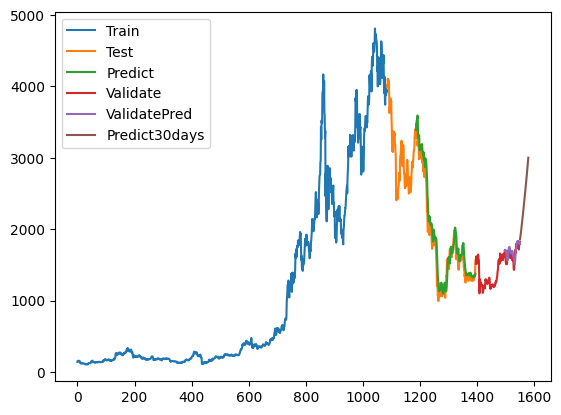

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()